<a href="https://colab.research.google.com/github/antonioalbanese/Time-Series-Anomaly-Detection-An-experimental-survey/blob/main/Experiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# !pip install wandb --quiet
# !wandb login

# import wandb

!pip install torchinfo --quiet

!git clone https://github.com/antonioalbanese/Time-Series-Anomaly-Detection-An-experimental-survey/

%cd Time-Series-Anomaly-Detection-An-experimental-survey

# %mkdir dataset
# !gdown https://drive.google.com/uc?id=1ZCLBU_pKTbsPlcj_LwxZE3IRy6mrlys3 -O="./dataset/MSL.zip"
# !gdown https://drive.google.com/uc?id=18JNYBsaX7tu0Qfgo92nCBCklv471L1xB -O="./dataset/SMD.zip"
# import zipfile
# with zipfile.ZipFile("./dataset/MSL.zip", 'r') as zip_ref:
#     zip_ref.extractall("./dataset/")
# with zipfile.ZipFile("./dataset/SMD.zip", 'r') as zip_ref:
#     zip_ref.extractall("./dataset/")

Cloning into 'Time-Series-Anomaly-Detection-An-experimental-survey'...
remote: Enumerating objects: 955, done.
remote: Counting objects: 100% (438/438), done.
remote: Compressing objects: 100% (183/183), done.
remote: Total 955 (delta 298), reused 370 (delta 255), pack-reused 517
Receiving objects: 100% (955/955), 2.78 MiB | 15.24 MiB/s, done.
Resolving deltas: 100% (571/571), done.
/content/Time-Series-Anomaly-Detection-An-experimental-survey


In [2]:
!mkdir data
!mkdir data/SWAT
#normal period
!python USAD/gdrivedl.py https://drive.google.com/open?id=1rVJ5ry5GG-ZZi5yI4x9lICB8VhErXwCw data/SWAT
#anomalies
!python USAD/gdrivedl.py https://drive.google.com/open?id=1iDYc0OEmidN712fquOBRFjln90SbpaE7 data/SWAT

data/SWAT/SWaT_Dataset_Normal_v1.csv
[==================================================] 163.77MB/163.77MB
data/SWAT/SWaT_Dataset_Attack_v0.csv
[==================================================] 127.27MB/127.27MB


In [5]:
### NEW USAD 
from AnomalyDetectionMethodClass import ADMethod

configuration = {
    'DATASET': 'SWAT', #SWAT, MSL, SMD, NAB
    'DATAPATH': None, #"realKnownCause/machine_temperature_system_failure.csv", #Only needed with NAB
    'SEQ_LEN': 100,
    'STEP': 100,
    'HIDDEN_SIZE': 100, #Needed for USAD method
    'LR': 0.0001,
    'EPOCHS': 50, 
    'VERBOSE': True
}
method = ADMethod(name = 'USAD', config = configuration)
train_history = method.train()
_, score = method.test()


Initializing...


/content/Time-Series-Anomaly-Detection-An-experimental-survey/datafactory.py:25: DtypeWarning: Columns (26) have mixed types.Specify dtype option on import or set low_memory=False.
  self.load_data()
/content/Time-Series-Anomaly-Detection-An-experimental-survey/datafactory.py:25: DtypeWarning: Columns (1,9,28,46) have mixed types.Specify dtype option on import or set low_memory=False.
  self.load_data()
/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:566: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Data preprocessing and method configuration finished in 28.59140944480896 sec.
Model summary: 
Layer (type:depth-idx)                   Param #
UsadModel                                --
├─UsadEncoder: 1-1                       --
│    └─Linear: 2-1                       13,007,550
│    └─Linear: 2-2                       3,252,525
│    └─Linear: 2-3                       12,760,000
│    └─ReLU: 2-4                         --
├─UsadDecoder: 1-2                       --
│    └─Linear: 2-5                       12,751,275
│    └─Linear: 2-6                       3,253,800
│    └─Linear: 2-7                       13,010,100
│    └─ReLU: 2-8                         --
│    └─Sigmoid: 2-9                      --
├─UsadDecoder: 1-3                       --
│    └─Linear: 2-10                      12,751,275
│    └─Linear: 2-11                      3,253,800
│    └─Linear: 2-12                      13,010,100
│    └─ReLU: 2-13                        --
│    └─Sigmoid: 2-14                   

NameError: ignored

In [4]:
history = method.train()

Training...
Epoch 1/100: train_loss_1:0.02646759055758953. train_loss_2:0.02633265929977858
Epoch 2/100: train_loss_1:0.029782477365289297. train_loss_2:-0.009821017576025132
Epoch 3/100: train_loss_1:0.022938725529928452. train_loss_2:-0.00954825119374113
Epoch 4/100: train_loss_1:0.03228981701231757. train_loss_2:-0.021869422078138377
Epoch 5/100: train_loss_1:0.02025915036426374. train_loss_2:-0.013489625632998613
Epoch 6/100: train_loss_1:0.02796821907179913. train_loss_2:-0.0209273258626553
Epoch 7/100: train_loss_1:0.041880360902229574. train_loss_2:-0.03539721559471577
Epoch 8/100: train_loss_1:0.044326835500225883. train_loss_2:-0.0395004357136556
Epoch 9/100: train_loss_1:0.03220559053991082. train_loss_2:-0.026503733242861927
Epoch 10/100: train_loss_1:0.0683128937251038. train_loss_2:-0.0584050193199037
Epoch 11/100: train_loss_1:0.06654218888991041. train_loss_2:-0.05834852048644313
Epoch 12/100: train_loss_1:0.06465578692056882. train_loss_2:-0.0596181133095129
Epoch 13/10

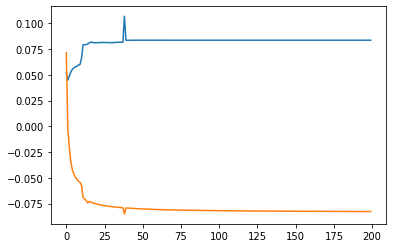

In [7]:
import matplotlib.pyplot as plt

plt.plot(train_history["TRAIN_LOSSES_1"])
plt.plot(train_history["TRAIN_LOSSES_2"])
plt.show()

In [21]:
### NEW DEEPANT 
from AnomalyDetectionMethodClass import ADMethod

configuration = {
    'DATASET': 'NAB', #SWAT, MSL, SMD
    'DATAPATH': "realKnownCause/machine_temperature_system_failure.csv", #Only needed with NAB
    'SEQ_LEN': 30,
    'STEP': 30,
    'HIDDEN_SIZE': None, #Needed for USAD method
    'LR': 0.0001,
    'EPOCHS': 15, #50 for SWAT
    'VERBOSE': True
}
method = ADMethod(name = 'DEEPANT', config = configuration)
train_losses = method.train()
predictions, score = method.test()
rep = method.results(0.45, True)

Initializing...
NAB DS
FEAT:  1
NAB DS
FEAT:  1
Data preprocessing and method configuration finished in 0.049334049224853516 sec.
Model summary: 
Layer (type:depth-idx)                   Param #
DeepAnt                                  --
├─Sequential: 1-1                        --
│    └─Conv1d: 2-1                       128
│    └─ReLU: 2-2                         --
│    └─MaxPool1d: 2-3                    --
├─Sequential: 1-2                        --
│    └─Conv1d: 2-4                       3,104
│    └─ReLU: 2-5                         --
│    └─MaxPool1d: 2-6                    --
├─Flatten: 1-3                           --
├─Sequential: 1-4                        --
│    └─Linear: 2-7                       7,720
│    └─ReLU: 2-8                         --
│    └─Dropout: 2-9                      --
├─Linear: 1-5                            41
Total params: 10,993
Trainable params: 10,993
Non-trainable params: 0
Training...


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:566: UserWarning:

This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.



Epoch 1/15: train_loss:0.7016321023305258
Epoch 2/15: train_loss:0.6980091333389282
Epoch 3/15: train_loss:0.6897910435994467
Epoch 4/15: train_loss:0.6721156438191732
Epoch 5/15: train_loss:0.6437764763832092
Epoch 6/15: train_loss:0.6070162256558737
Epoch 7/15: train_loss:0.5614681839942932
Epoch 8/15: train_loss:0.506227026383082
Epoch 9/15: train_loss:0.44718440373738605
Epoch 10/15: train_loss:0.3781435588995616
Epoch 11/15: train_loss:0.2997952699661255
Epoch 12/15: train_loss:0.21684221923351288
Epoch 13/15: train_loss:0.13366234302520752
Epoch 14/15: train_loss:0.0919684146841367
Epoch 15/15: train_loss:0.18545797963937125
Training finished in 4.454534292221069 sec., avg time per epoch: 0.29696895281473795 sec.
Testing...
Test finished in 2.1562609672546387 sec.
Computing results... 
              precision    recall  f1-score   support

       False       0.95      0.93      0.94       677
        True       0.51      0.59      0.55        79

    accuracy                     

In [25]:
method.train_ds.n_features

51

In [3]:
!mkdir input
!mkdir input/SWAT
#normal period
!python USAD/gdrivedl.py https://drive.google.com/open?id=1rVJ5ry5GG-ZZi5yI4x9lICB8VhErXwCw input
#anomalies
!python USAD/gdrivedl.py https://drive.google.com/open?id=1iDYc0OEmidN712fquOBRFjln90SbpaE7 input

input/SWaT_Dataset_Normal_v1.csv
[==================================================] 163.77MB/163.77MB
input/SWaT_Dataset_Attack_v0.csv
[==================================================] 127.27MB/127.27MB


In [7]:
### USAD
from AnomalyDetectionMethodClass import ADMethod_back
settings_={
    'EPOCHS':20,
    'BATCH_SIZE': 256,
    'SEQ_LEN': 12,
    'HIDDEN_SIZE': 100,
    'ALPHA': 0.5,
    'BETA': 0.5,
    'CONFIDENCE': 0.82,
    'DATASET': 'SWAT'}
data_path = ''
method_ = ADMethod_back('USAD',settings_,'')

method_.prepare_pipeline()
#h = method.train()
#scores, report = method.test()

/content/Time-Series-Anomaly-Detection-An-experimental-survey/USAD/USADSolver.py:22: DtypeWarning: Columns (26) have mixed types.Specify dtype option on import or set low_memory=False.
  self.prepare_data()
/content/Time-Series-Anomaly-Detection-An-experimental-survey/USAD/USADSolver.py:22: DtypeWarning: Columns (1,9,28,46) have mixed types.Specify dtype option on import or set low_memory=False.
  self.prepare_data()


(494988, 12, 51)


In [8]:
for [el] in method_.solver.train_loader:
  print(el.size())
  break
  

torch.Size([256, 612])


In [4]:
for el in method.train_dl:
  print(el.size())
  break



torch.Size([256, 612])


In [20]:
for el in method.solver.train_loader:
  print(el[0].shape)
  print(len(el))
  break

torch.Size([7919, 612])
1


In [ ]:
###  TRANSFORMER
from AnomalyDetectionMethodClass import ADMethod
data_path = './dataset/MSL'
settings = {
    'lr':1e-4,
    'num_epochs':3,
    'k':3,
    'win_size':100,
    'input_c':55,
    'output_c':55,
    'batch_size':256,
    'pretrained_model':None,
    'dataset':'MSL',
    'mode':'train', # choices=['train', 'test']
    'data_path':'./dataset/MSL',
    'model_save_path':'checkpoints',
    'anormly_ratio':1
}
method = ADMethod('transformer',settings, data_path)

method.prepare_pipeline()
method.train()
scores, report = method.test()

In [ ]:
### DEEPANT
from AnomalyDetectionMethodClass import ADMethod
# data_path = './NAB/realKnownCause/cpu_utilization_asg_misconfiguration.csv'
data_path = './dataset/MSL'


LR_LIST = [0.001, 0.0001, 0.00001, 0.000001]
SEQ_LIST = [100, 30, 100, 300]
for lr in [0.0001]:#LR_LIST:
  for seq in [100]: #SEQ_LIST:
    # wandb.init(project="experimental-survey-AD", entity="michiamoantonio", group='DeepAnt')
    # wandb.log({'lr': lr})
    # wandb.log({'seq_len': seq})
    settings = {
      'SEQ_LEN': seq,
      'out_dim': 1,
      'EPOCHS': 1,
      'LR': lr,
      'CONFIDENCE': 0.50,
      'TH_LIST': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
      'TH_SEARCH': True,
      'VERBOSE': True,
      'DATASET': 'SWAT'
    }
    # wandb.config = settings
    method = ADMethod('DeepAnt',settings, data_path)

    method.prepare_pipeline()
    l = method.train()
    scores, report = method.test()

    print(f"lr: {lr}, seq_len: {seq}")
    for i,el in enumerate(report): 
      print(f"#### th: {settings['TH_LIST'][i]}, f1-score: {el['macro avg']['f1-score']}")
      # wandb.log({'th': settings['TH_LIST'][i], 'f1-score': el['macro avg']['f1-score']})
    # wandb.finish()



LOAD TRAIN DATA


/content/Time-Series-Anomaly-Detection-An-experimental-survey/DeepAnt/DeepAntSolver.py:22: DtypeWarning: Columns (26) have mixed types.Specify dtype option on import or set low_memory=False.
  self.prepare_data(data_path)


SCALER
SCALED
window
WINDOWED


In [ ]:
!pip install torchinfo
from torchinfo import summary
summary(method.solver.model)